# Credit Risk Classifier: Cornerstone of Mordern Banking

# Business Understanding

Credit risk has become a invaluable tool in the mordern banking industry. Credit risk classifiers serve as a building block for informed decision-making and optimized financial management.

Credit risk classifier models, if set up correctly, can improve a banks strategic goals and be more effective and may result in satisfying the triple bottom line. TBL can be improve in the following aspects:

1. People 

    - Financial incluesion will increase becasue the classifier has identified loan worth customers and in-turn the bank can expand it loan portfolio and include more minorities

    - Community Development: By identifying loan worth consumers that will utlilze the funds to their betterment will result to a chain reaction of growth in the community

2. Planet - Corporate Social Responisbility can be conduct in the a more frequnetl and larger scale due to the decrease in losses from deliquent customers.

3. Profit - Financial stability is mandatory and essential for the ensurance of longevity. Banks ensure longevity using risk management techniques such as credit risk classifiers        

# Business Problem

Equity Bank, a leading financial institution in East Africa. Equity Bank wants to expand it loan portfolio without negatively affecting its TBL. However reports for the year 2023 showed a increase in loan deafults and non-performing loans. Equity's stakeholders require a system to predict the credit risk consumers precisely and accurately

# Main Objective

Implement a credit risk classification system to improve loan approval decisions. The following outcome will be expected from this classifer will be the following: 

    1. reducing non-performing loan ration

    2. increase portfolio growth

    3. enhance operational efficiceny

In [246]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [247]:

data = pd.read_csv('credit_risk_dataset.csv')
data = pd.DataFrame(data)
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# Data Understanding

**Personal Information:**

person_age: This column likely represents the borrower's age in years. It can be a factor in assessing creditworthiness as younger individuals might have a shorter credit history and potentially less stable income.

person_income: This column indicates the borrower's annual income. Income is a crucial factor in determining loan eligibility and the borrower's ability to repay.

person_home_ownership: This column specifies whether the borrower owns their home (e.g., "RENT", "MORTGAGE", "OWN"). Homeownership can be a positive indicator of financial stability and responsibility.

person_emp_length: This column represents the borrower's employment length (e.g., in years). Stable employment demonstrates a consistent income source, which is essential for loan repayment.

**Loan Information:**

loan_intent: This column likely indicates the borrower's purpose for taking the loan (e.g., "debt_consolidation", "home_improvement"). The purpose can influence the risk assessment as some loan purposes might be deemed riskier than others.

loan_grade: This column represents the credit rating assigned to the loan by the lender. It reflects the perceived risk associated with the loan based on the borrower's creditworthiness.

loan_amnt: This column specifies the loan amount requested by the borrower. Higher loan amounts generally translate to higher risk for the lender.

loan_int_rate: This column indicates the interest rate charged on the loan. The interest rate is often determined by the borrower's creditworthiness and the loan grade.

**Loan Status and Repayment History:**

loan_status: This column likely indicates the current status of the loan (e.g., "current", "late", "charged_off"). It reflects the borrower's repayment behavior and their ability to meet their loan obligations.

loan_percent_income: This column represents the loan amount as a percentage of the borrower's income. A high loan-to-income ratio indicates a larger 
financial burden on the borrower and potentially higher risk of default.

**Credit Bureau Information:**

cb_person_default_on_file: This column likely indicates whether the borrower has any past loan defaults recorded in their credit bureau report (e.g., "Yes", "No"). A history of defaults suggests a higher risk of future defaults.

cb_person_cred_hist_length: This column represents the length of the borrower's credit history (e.g., in years). A longer credit history allows for a more comprehensive assessment of the borrower's repayment behavior.

# Data Pre-processing

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [249]:
null_num = []

for i in data.columns:
    x = data[i].isnull().sum()
    null_num.append(x)

null_num_pd = pd.DataFrame(null_num,columns=['Total Missing Values'],index=data.columns)
null_num_pd.sort_values(by='Total Missing Values',ascending=False)

,Total Missing Values
loan_int_rate,3116
person_emp_length,895
person_age,0
person_income,0
person_home_ownership,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_status,0
loan_percent_income,0


# How to deal with missing values

- When presented with missing values the following steps should followed before dropping or replacing the missing values, with mean or mode, check the following characteristics of the variable:

1. Analyze the distribution of the variable (loan_int)

- Once, the distribution has be identified then undertke the following steps: 

    1. If the distribution is normal then replace with **mean** is a viable option

    2. If the distribution is skewed then replace with median. Median is a good option due to the fact its not as sensitive to outliers as compared to mode or mean

In [250]:
# Deal with the missing values
# Find the average loan int rate
print(data['loan_int_rate'].mean())
print(data['loan_int_rate'].mode())

11.011694892245036
0    7.51
Name: loan_int_rate, dtype: float64


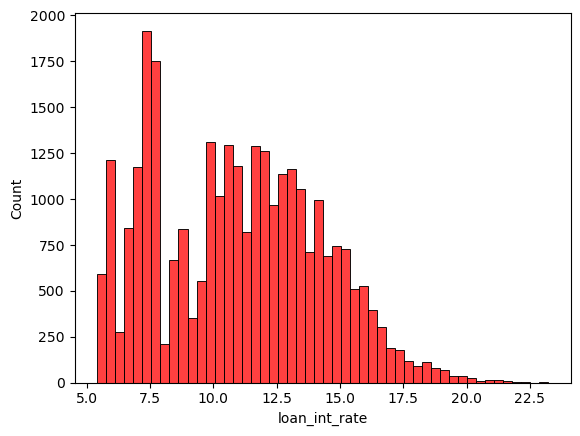

In [251]:
#Plot the histrogram
loan_int_rate_dist = sns.histplot(data['loan_int_rate'],palette='Flare',color='r')

## Findings

The data is skewed to the left, therefore the best options is using the median measure of central tendacy

In [252]:
# Replace missing values with the median of each column in: 'loan_int_rate'
data = data.fillna({'loan_int_rate': data['loan_int_rate'].median()})
# Check the missing values
null_num = []

for i in data.columns:
    x = data[i].isnull().sum()
    null_num.append(x)

null_num_pd = pd.DataFrame(null_num,columns=['Total Missing Values'],index=data.columns)
null_num_pd.sort_values(by='Total Missing Values',ascending=False)


,Total Missing Values
person_emp_length,895
person_age,0
person_income,0
person_home_ownership,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


**The missing values in the person_emp_length amount to 895 out of 32581 which is only 2.74699% of the dataset therefore dropping the values wont affect the analysis.**

In [253]:
# Drop missing values
data = data.dropna(subset='person_emp_length')

null_num = []

for i in data.columns:
    x = data[i].isnull().sum()
    null_num.append(x)

null_num_pd = pd.DataFrame(null_num,columns=['Total Missing Values'],index=data.columns)
null_num_pd.sort_values(by='Total Missing Values',ascending=False)

,Total Missing Values
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


# Explorotory Data Analysis

In [254]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [255]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31686.000000,3.168600e+04,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000
mean,27.747302,6.669188e+04,4.789686,9661.337815,11.035070,0.215426,0.169612,5.809316
std,6.360283,6.242729e+04,4.142630,6336.226458,3.070152,0.411124,0.106297,4.060867
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.939700e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.160000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


**Using seaborn's boxplot find the general area where outliers are situated**

Text(0, 0.5, 'Persons Age')

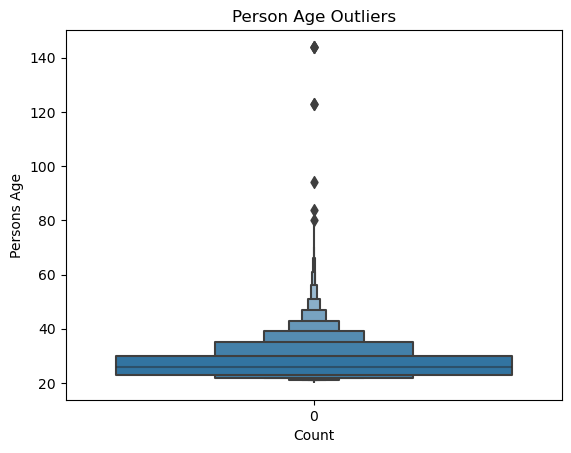

In [256]:
sns.boxenplot(data['person_age'])
plt.title('Person Age Outliers')
plt.xlabel('Count')
plt.ylabel('Persons Age')

**The area of concern is from 100 to 144. In order to be more precise select the person_age column and reorder in descending order**

In [257]:
# Find the threshold for the outlier
data['person_age'].sort_values(ascending=False).head(20)

183      144
81       144
32297    144
747      123
575      123
32416     94
32506     84
32422     80
32355     78
32534     76
32381     73
32521     73
32432     73
32385     70
32334     70
32532     70
32522     70
32383     70
32436     70
32378     69
Name: person_age, dtype: int64

**Threshold is 94 years. Using z-score identify persons in the data set older than 94 years old and drop them.**

Text(0, 0.5, 'Persons Age')

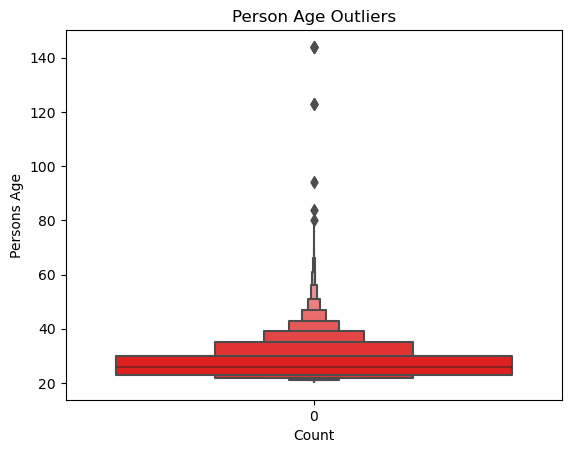

In [258]:
sns.boxenplot(data['person_age'],color='r')
plt.title('Person Age Outliers')
plt.xlabel('Count')
plt.ylabel('Persons Age')

In [259]:

# Assuming your data is in a DataFrame named 'data' and the column containing numerical values is 'column_name'

def iqr_outlier_removal(data, column_name):

  # Calculate quartiles
  q1 = data[column_name].quantile(0.25)
  q3 = data[column_name].quantile(0.995)

  # Calculate IQR
  iqr = q3 - q1

  # Define lower and upper bounds
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  # Identify outliers
  outlier_mask = (data[column_name] < lower_bound) | (data[column_name] > upper_bound)

  # Filter data to remove outliers
  filtered_data = data[~outlier_mask]

  return filtered_data


In [262]:
filtered_data = iqr_outlier_removal(data,'person_age')

Text(0, 0.5, 'Persons Age')

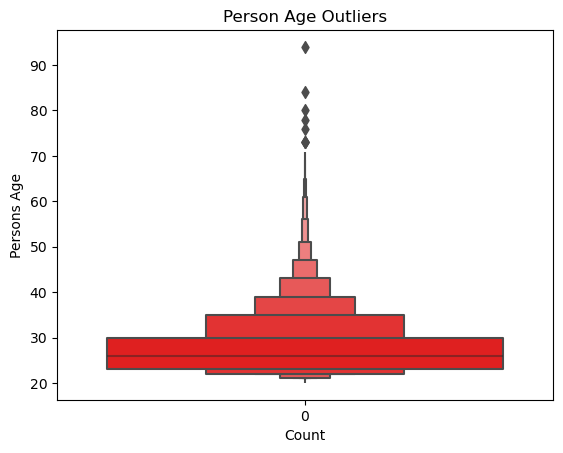

In [263]:

sns.boxenplot(filtered_data['person_age'],color='r')
plt.title('Person Age Outliers')
plt.xlabel('Count')
plt.ylabel('Persons Age')

# Converting integer to boolean

When do you convert interger to boolean:

1. When the data collected clearly communicates a Yes or No answer and there arent any categories of answers such 'average', 'below average','above average.' LabelEncoding is suitable for this column


2. When the data carries a deeper mean to the variable then do not use a label encoding method instead use the OneLabelEncoding method.

Convert the following columns in this order:

    1. cb_person_default_on_file  use LabelEncoding

    2.person_home_ownership, loan_grade and loan_intent  use OneHotEncoding Label

# One Hot Encoding

In [78]:
# Convert OneHotEncoding variable 
# One-hot encode columns: 'loan_intent', 'person_home_ownership', 'loan_grade'
#insert_loc = data.columns.get_loc('loan_intent')
#data = pd.concat([data.iloc[:,:insert_loc], pd.get_dummies(data.loc[:, ['loan_intent', 'person_home_ownership', 'loan_grade']]), data.iloc[:,insert_loc+1:]], axis=1)
#data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,...,loan_grade_E,loan_grade_F,loan_grade_G,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,False,False,False,False,True,False,...,False,False,False,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,False,True,False,False,False,False,...,False,False,False,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,False,False,False,True,False,False,...,False,False,False,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,False,False,False,True,False,False,...,False,False,False,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,False,False,False,True,False,False,...,False,False,False,C,35000,14.27,1,0.55,Y,4


In [79]:
#data.drop(['loan_grade','person_home_ownership'],axis=1,inplace=True)
#data.head()

,person_age,person_income,person_emp_length,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_MORTGAGE,...,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,123.0,False,False,False,False,True,False,False,...,True,False,False,False,35000,16.02,1,0.59,Y,3
1,21,9600,5.0,False,True,False,False,False,False,False,...,False,False,False,False,1000,11.14,0,0.10,N,2
2,25,9600,1.0,False,False,False,True,False,False,True,...,False,False,False,False,5500,12.87,1,0.57,N,3
3,23,65500,4.0,False,False,False,True,False,False,False,...,False,False,False,False,35000,15.23,1,0.53,N,2
4,24,54400,8.0,False,False,False,True,False,False,False,...,False,False,False,False,35000,14.27,1,0.55,Y,4


# Label Encoding

In [80]:
#label = LabelEncoder()
#x = data['cb_person_default_on_file']

#y =label.fit_transform(data['cb_person_default_on_file'])

#data['cb_person_default_on_file'] = y
#data.head()


,person_age,person_income,person_emp_length,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_MORTGAGE,...,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,123.0,False,False,False,False,True,False,False,...,True,False,False,False,35000,16.02,1,0.59,1,3
1,21,9600,5.0,False,True,False,False,False,False,False,...,False,False,False,False,1000,11.14,0,0.10,0,2
2,25,9600,1.0,False,False,False,True,False,False,True,...,False,False,False,False,5500,12.87,1,0.57,0,3
3,23,65500,4.0,False,False,False,True,False,False,False,...,False,False,False,False,35000,15.23,1,0.53,0,2
4,24,54400,8.0,False,False,False,True,False,False,False,...,False,False,False,False,35000,14.27,1,0.55,1,4
